<a href="https://colab.research.google.com/github/uvads6050/DS6050---24F/blob/main/M2_6_Tutorial_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 2.6 – Introduction to Artificial Neural Networks with Keras

This code tutorial provides hands-on experience on how to implement neural networks using the popular Keras API. It is a beautifully designed and simple high-level API for building, training, evaluating, and running neural networks. Despite its simplicity, Keras is expressive and flexible enough for you to build a wide variety of neural network architectures, which should be sufficient for most of your use cases.  

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0-preview.

In [3]:
#pip install tensorflow

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Python ≥3.5 is required
import sys
#assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
#assert sklearn.__version__ >= "0.20"

# INSERT THE LINE BELOW TO SELECT TENSORFLOW 2.0
# %tensorflow_version 2.x
# TensorFlow ≥2.0-preview is required
import tensorflow as tf
print(tf.__version__)
#assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

C:\Users\zlism\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2.17.0


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [5]:
#@title Default title text
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [6]:
y_pred

array([1], dtype=int64)

Saving figure perceptron_iris_plot


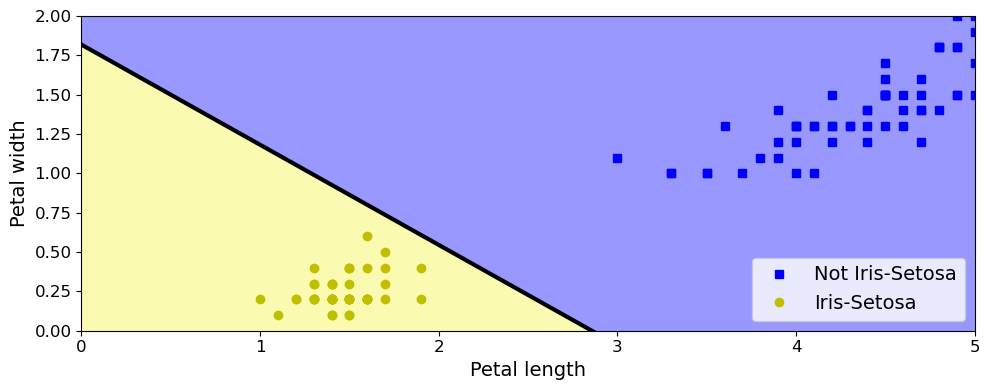

In [7]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


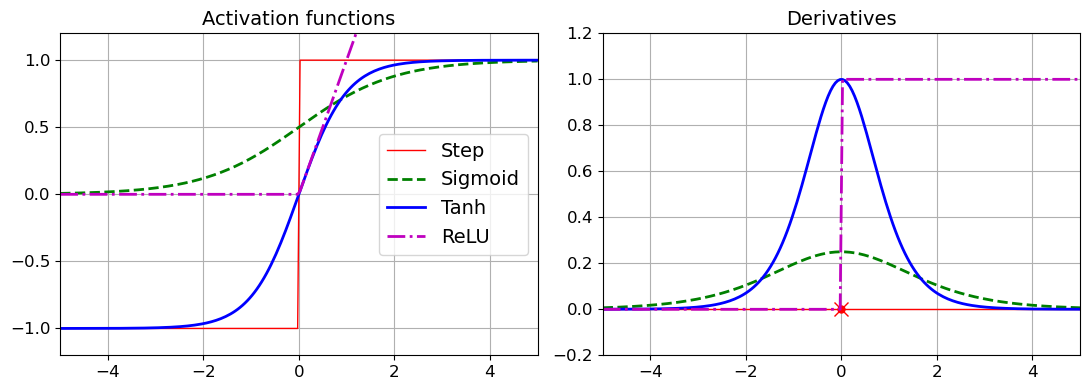

In [12]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [13]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

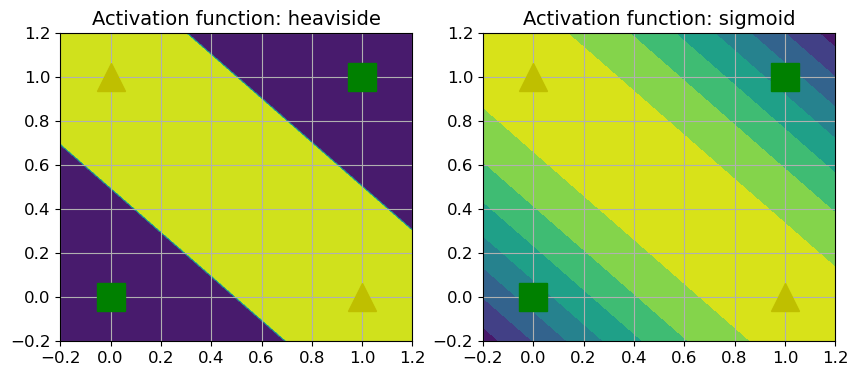

In [14]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
tf.__version__

'2.10.0'

In [17]:
keras.__version__

'2.10.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [19]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [20]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [21]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
X_valid.dtype

dtype('float64')

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

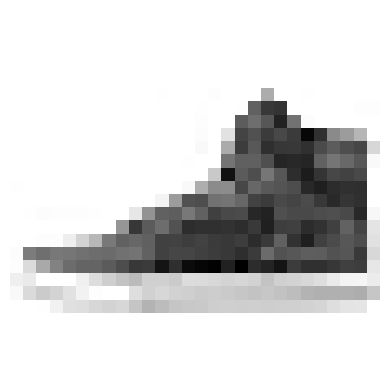

In [22]:
plt.imshow(X_train[20], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [25]:
class_names[y_train[20]]

'Sneaker'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [26]:
X_valid.shape

(5000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

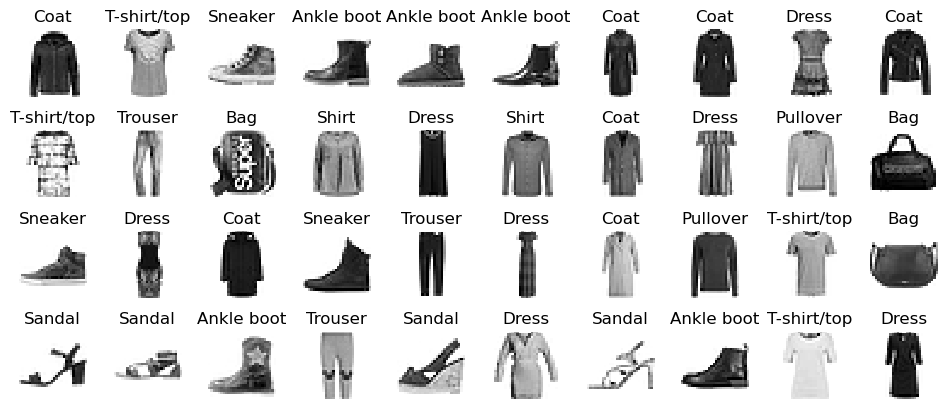

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.layers

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [39]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [40]:
model.get_layer(hidden1.name) is hidden1

True

In [41]:
weights, biases = hidden1.get_weights()

In [42]:
weights

array([[ 0.02833088, -0.05399087,  0.02396652, ...,  0.02011655,
        -0.04637908, -0.03359516],
       [-0.05797949,  0.04587229,  0.05393535, ..., -0.0158667 ,
        -0.06886097,  0.05707616],
       [-0.03053155,  0.03797309,  0.01957309, ..., -0.05996849,
         0.05774434, -0.06420562],
       ...,
       [-0.06453843,  0.00187294,  0.0739219 , ..., -0.0167817 ,
         0.06744489,  0.00898536],
       [ 0.05078425,  0.02911122, -0.03049059, ...,  0.02722922,
        -0.0520429 ,  0.04801453],
       [ 0.06870389,  0.05444163, -0.0517879 , ..., -0.02726803,
         0.04209977, -0.01363424]], dtype=float32)

In [43]:
weights.shape

(784, 300)

In [44]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
biases.shape

(300,)

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [47]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7239 - accuracy: 0.7634 - val_loss: 0.5264 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4905 - accuracy: 0.8273 - val_loss: 0.4395 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4444 - accuracy: 0.8425 - val_loss: 0.5578 - val_accuracy: 0.7916
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4173 - accuracy: 0.8543 - val_loss: 0.3971 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3986 - accuracy: 0.8610 - val_loss: 0.3812 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3799 - accuracy: 0.8663 - val_loss: 0.3764 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3680 - accuracy: 0.8701 - val_loss: 0.3678 - val_ac

In [48]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [49]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


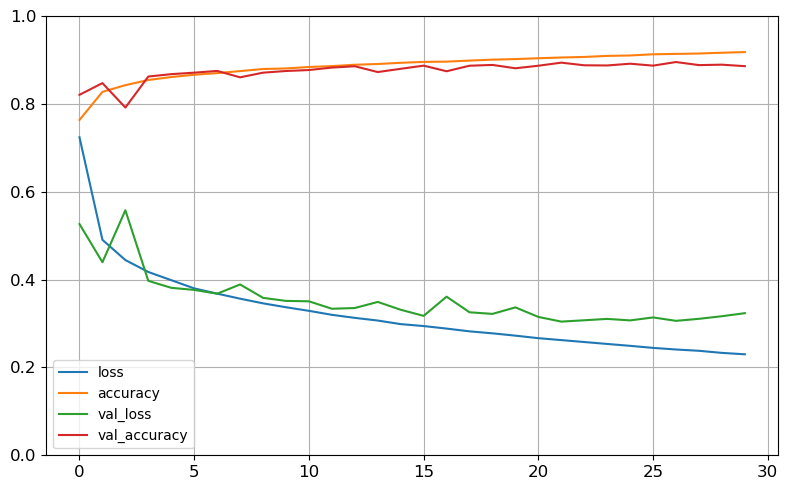

In [51]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3522 - accuracy: 0.8776


[0.352152943611145, 0.8776000142097473]

In [53]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 434ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

1/1 [==============================] - 0s 76ms/step


array([9, 2, 1], dtype=int64)

In [57]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
y_new = y_test[20]
y_new

2

Saving figure fashion_mnist_images_plot


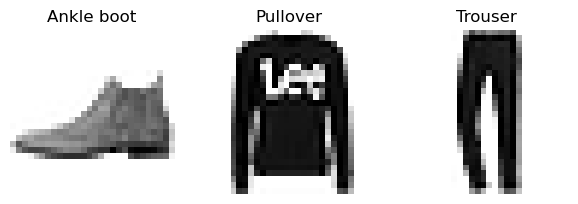

In [59]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [63]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [64]:
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

c:\Users\adewo\anaconda3\envs\dl_venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 2.1808 - val_loss: 1.0308
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8388 - val_loss: 1.1386
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6938 - val_loss: 0.6529
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6365 - val_loss: 0.5809
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6005 - val_loss: 0.5557
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5705 - val_loss: 0.5258
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5470 - val_loss: 0.5032
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5270 - val_loss: 0.4981
Epoch 9/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5097 - val_loss: 0.4751
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4955 - val_loss: 0.4611

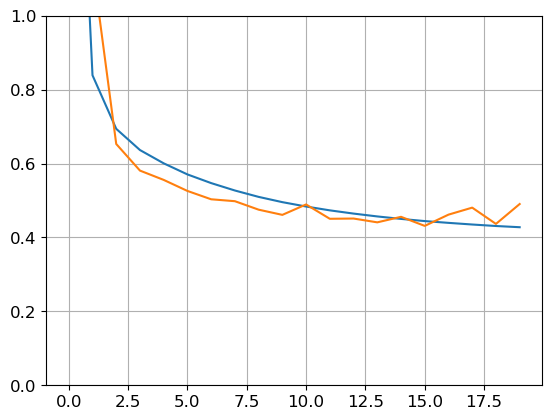

In [68]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
y_pred

array([[0.5032939],
       [1.6824762],
       [3.3509142]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [72]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [73]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 2.2397 - val_loss: 2.8403
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7465 - val_loss: 1.5176
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6582 - val_loss: 0.6206
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5949 - val_loss: 0.5521
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5601 - val_loss: 0.5429
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5319 - val_loss: 0.5211
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5116 - val_loss: 0.4826
Epoch 8/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4955 - val_loss: 0.4736
Epoch 9/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4819 - val_loss: 0.4575
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4710 - val_loss: 0.4508

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [75]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 5s 9ms/step - loss: 2.2317 - val_loss: 2.1147
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.8058 - val_loss: 1.2025
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.7098 - val_loss: 0.8627
Epoch 4/20
363/363 [==============================] - 2s 7ms/step - loss: 0.6652 - val_loss: 0.7327
Epoch 5/20
363/363 [==============================] - 2s 7ms/step - loss: 0.6357 - val_loss: 0.6124
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6102 - val_loss: 0.5740
Epoch 7/20
363/363 [==============================] - 2s 7ms/step - loss: 0.5896 - val_loss: 0.5398
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5701 - val_loss: 0.5197
Epoch 9/20
363/363 [==============================] - 2s 7ms/step - loss: 0.5524 - val_loss: 0.5040
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5362 - val_loss: 0.4899

Adding an auxiliary output for regularization:

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [79]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [80]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 6s 10ms/step - loss: 2.5468 - main_output_loss: 2.3196 - aux_output_loss: 4.5918 - val_loss: 2.1575 - val_main_output_loss: 1.8915 - val_aux_output_loss: 4.5509
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 1.0402 - main_output_loss: 0.8306 - aux_output_loss: 2.9272 - val_loss: 1.2475 - val_main_output_loss: 1.0578 - val_aux_output_loss: 2.9550
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.8506 - main_output_loss: 0.7119 - aux_output_loss: 2.0986 - val_loss: 0.8837 - val_main_output_loss: 0.7393 - val_aux_output_loss: 2.1833
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.7577 - main_output_loss: 0.6549 - aux_output_loss: 1.6822 - val_loss: 0.7495 - val_main_output_loss: 0.6354 - val_aux_output_loss: 1.7768
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.7008 - main_output_loss: 0.6157 - aux_output_loss: 1.4667 - val_los

In [81]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 335ms/step


# The subclassing API

In [82]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [83]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 6s 8ms/step - loss: 2.3037 - output_1_loss: 2.0448 - output_2_loss: 4.6339 - val_loss: 2.6906 - val_output_1_loss: 2.5355 - val_output_2_loss: 4.0866
Epoch 2/10
363/363 [==============================] - 2s 7ms/step - loss: 1.0016 - output_1_loss: 0.8136 - output_2_loss: 2.6936 - val_loss: 1.3252 - val_output_1_loss: 1.1086 - val_output_2_loss: 3.2752
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7769 - output_1_loss: 0.6558 - output_2_loss: 1.8674 - val_loss: 0.8840 - val_output_1_loss: 0.6554 - val_output_2_loss: 2.9419
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6848 - output_1_loss: 0.5886 - output_2_loss: 1.5511 - val_loss: 0.7638 - val_output_1_loss: 0.5540 - val_output_2_loss: 2.6513
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6332 - output_1_loss: 0.5479 - output_2_loss: 1.4007 - val_loss: 0.6870 - val_output_1_loss: 0.5019 - val_ou

In [84]:
model = WideAndDeepModel(30, activation="relu")

# Saving and Restoring

In [85]:
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [87]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 2.1451 - val_loss: 2.8953
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7756 - val_loss: 0.8212
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6210 - val_loss: 0.5882
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5732 - val_loss: 0.5296
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5410 - val_loss: 0.4989
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5147 - val_loss: 0.4751
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4940 - val_loss: 0.4560
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4772 - val_loss: 0.4415
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4636 - val_loss: 0.4293
Epoch 10/10
162/162 [==============================] - 1s 4ms/step - loss: 0.4428


In [88]:
model.save("my_keras_model.h5")

In [89]:
model = keras.models.load_model("my_keras_model.h5")

In [90]:
model.predict(X_new)

1/1 [==============================] - 0s 205ms/step


array([[0.7753272],
       [1.5125952],
       [3.0871477]], dtype=float32)

In [91]:
model.save_weights("my_keras_weights.ckpt")

In [92]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [95]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 4s 7ms/step - loss: 1.9040 - val_loss: 1.1082
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7543 - val_loss: 0.6954
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6621 - val_loss: 0.6374
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6135 - val_loss: 0.5743
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5771 - val_loss: 0.5367
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5474 - val_loss: 0.5086
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5240 - val_loss: 0.4859
Epoch 8/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5040 - val_loss: 0.4678
Epoch 9/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4876 - val_loss: 0.4529
Epoch 10/10
162/162 [==============================] - 1s 4ms/step - loss: 0.4584


In [96]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 4s 7ms/step - loss: 0.4621 - val_loss: 0.4411
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4520 - val_loss: 0.4465
Epoch 3/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4437 - val_loss: 0.4385
Epoch 4/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4361 - val_loss: 0.4538
Epoch 5/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4302 - val_loss: 0.4323
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4244 - val_loss: 0.4374
Epoch 7/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4198 - val_loss: 0.4433
Epoch 8/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4154 - val_loss: 0.4215
Epoch 9/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4114 - val_loss: 0.4226
Epoch 10/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4076 - val_lo

In [97]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [98]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

357/363 [============================>.] - ETA: 0s - loss: 0.3634
val/train: 1.03
363/363 [==============================] - 2s 6ms/step - loss: 0.3643 - val_loss: 0.3735


# TensorBoard

In [99]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [100]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_09_07-13_23_32'

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [103]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 7ms/step - loss: 1.6646 - val_loss: 1.1730
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.7341 - val_loss: 0.8165
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.6540 - val_loss: 0.6484
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6065 - val_loss: 0.5876
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5728 - val_loss: 0.5404
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5450 - val_loss: 0.5150
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5232 - val_loss: 0.5069
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5049 - val_loss: 0.4768
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4883 - val_loss: 0.4577
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4746 - val_loss: 0.4474

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [104]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [105]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2024_09_07-13_24_48'

In [106]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [108]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 6ms/step - loss: 0.5970 - val_loss: 38.1105
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================]

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [109]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [110]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [111]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [112]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\adewo\AppData\Local\Temp\ipykernel_26832\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [113]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 3s 6ms/step - loss: 1.1448 - val_loss: 3.3018
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.6895 - val_loss: 1.7765
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5706 - val_loss: 1.3138
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5245 - val_loss: 1.2624
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4806 - val_loss: 0.5526
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4557 - val_loss: 0.6793
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4403 - val_loss: 0.5339
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4302 - val_loss: 0.5195
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4218 - val_loss: 0.4046
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4153 - val_lo

In [114]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3782


In [115]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 202ms/step


In [116]:
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 2s 6ms/step - loss: 3.9670 - val_loss: 1.8362
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.2758 - val_loss: 0.9016
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8088 - val_loss: 0.7348
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6816
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6552 - val_loss: 0.6595
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6330 - val_loss: 0.8732
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6215 - val_loss: 0.8126
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6105 - val_loss: 0.8248
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6029 - val_loss: 0.6210
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000291801D3D90>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002918E4C89A0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [118]:
rnd_search_cv.best_params_

{'learning_rate': 0.003362564125268811, 'n_hidden': 2, 'n_neurons': 42}

In [119]:
rnd_search_cv.best_score_

-0.36207154393196106

In [120]:
rnd_search_cv.best_estimator_

In [121]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.3502


-0.3501829504966736

In [122]:
model = rnd_search_cv.best_estimator_.model
model

In [123]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.3502


0.3501829504966736